<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [98]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [100]:
data = pd.read_csv('./train.csv')

In [101]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [102]:
#посмотрим наличие nan в таблице с помощью info()
print(data.isna().mean())

#посмотрим на случайные 10 строк таблицы
random_rows = data.sample(n = 10)
random_rows

data['TotalSpent'] = data['TotalSpent'].replace(' ', 0)

missing_data = data.eq(' ')
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64
ClientPeriod
False    5282
Name: ClientPeriod, dtype: int64
 
MonthlySpending
False    5282
Name: MonthlySpending, dtype: int64
 
TotalSpent
False    5282
Name: TotalSpent, dtype: int64
 
Sex
False    5282
Name: Sex, dtype: int64
 
IsSeniorCitizen
False    5282
Name: IsSeniorCitizen, dtype: int64
 
HasPartner
False    5282
Name: HasPartner, dt

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

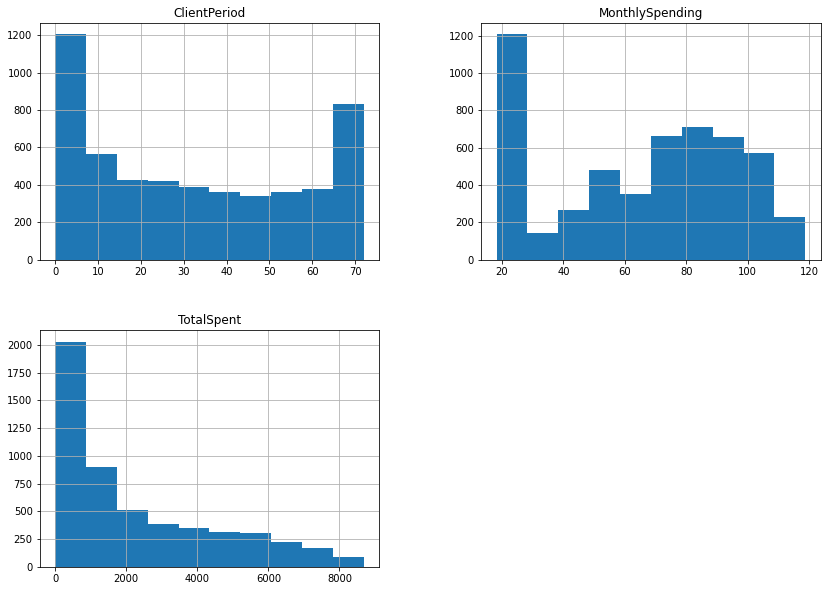

In [103]:
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.hist(column = num_cols, figsize=(14, 10))
None

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64
IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64
HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64
HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int6

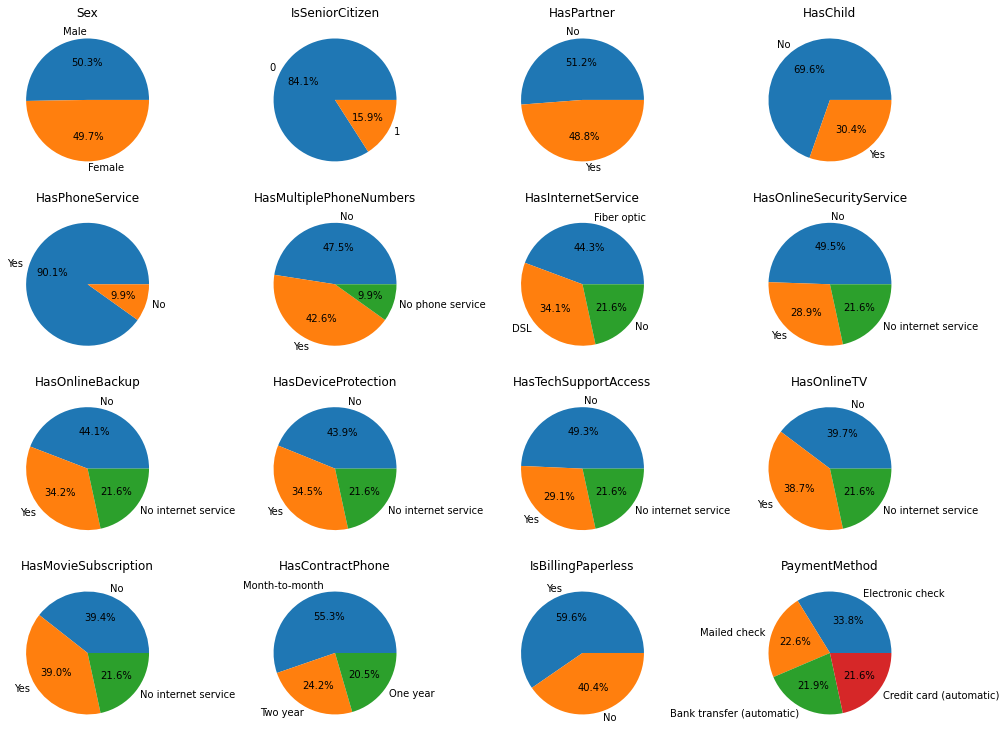

In [104]:
fig, ax = plt.subplots(4, 4, sharey = True, figsize=(17, 13))
k = 0
for col in cat_cols:
  print(f"{col} DISTRIBUTION")
  print(data[col].value_counts())
  df = data[col].value_counts()
  labels = df.index.tolist()
  val = df.values
  ax[k // 4][k % 4].pie(val, labels = labels, autopct='%.1f%%')
  ax[k // 4][k % 4].set_title(col)
  k += 1
plt.show()

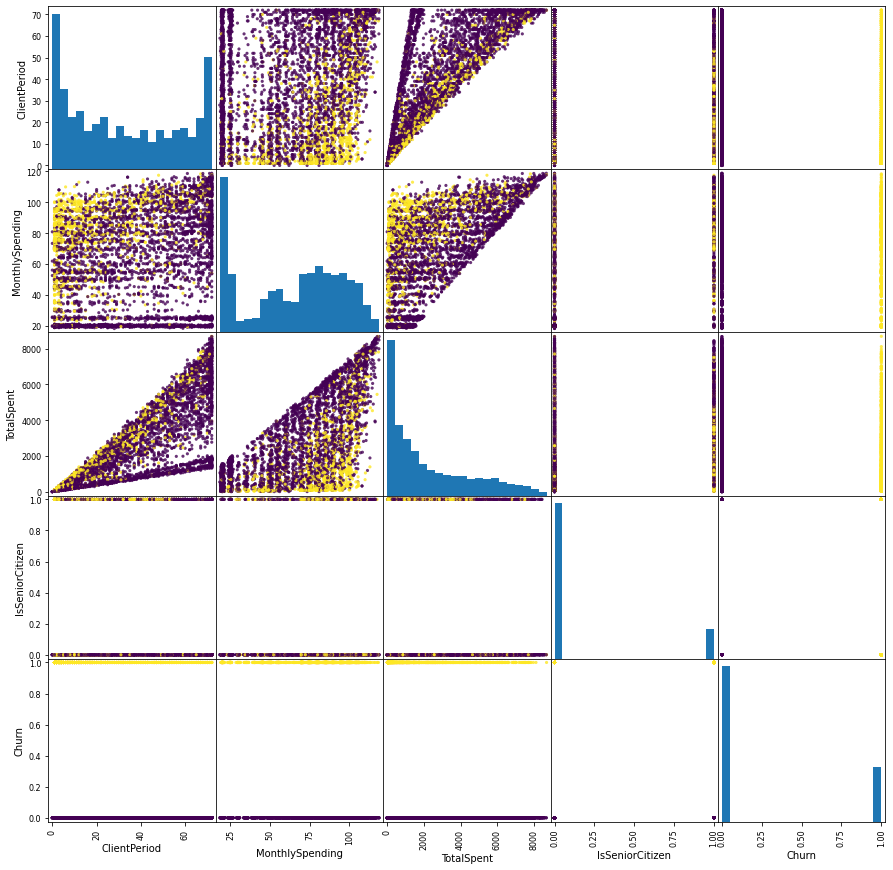

In [105]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

Классы сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [106]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [107]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [108]:
#нормируем и кодируем категориальные признаки
pca = StandardScaler()
X = pca.fit_transform(data[num_cols])

dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]

y = data[target_col]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [110]:
from sklearn.metrics import roc_auc_score, roc_curve

In [111]:
CV_model = LogisticRegressionCV(
                            Cs = [100, 10, 1, 0.1, 0.01, 0.001],
                            cv = 5, 
                            scoring = 'roc_auc',
                            n_jobs = -1, 
                            verbose = 10,
                            refit = True)

CV_model.fit(X_train, y_train)

print(f'best hyperparameter C = {CV_model.C_}')

y_train_predicted = CV_model.predict_proba(X_train)[:, 1]
y_valid_predicted = CV_model.predict_proba(X_valid)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)

print('train AUC={:.4f}'.format(train_auc))
print('valid AUC={:.4f}'.format(valid_auc))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.0s remaining:    2.0s


best hyperparameter C = [10.]
train AUC=0.8519
valid AUC=0.8294


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


test AUC=0.8294 \\
С = 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [112]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
from catboost import CatBoostRegressor
X_train, X_valid, y_train, y_valid = train_test_split(X_origin, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

GridSearchCV показал, что лучшие параметры такие: \\
depth = 3, learning_rate = 0.05, iterations = 500 \\
однако, мне удалось добиться лучшего качества :(

In [114]:
cbr = CatBoostRegressor(depth = 4, learning_rate=0.01, silent = True)
cbr.fit(X_train, y_train, cat_features = cat_cols)

print(f"Model is fitted: {str(cbr.is_fitted())}")
print(f"Model params: {cbr.get_params()}")

y_train_predicted = np.array(cbr.predict(X_train))
y_valid_predicted = np.array(cbr.predict(X_valid))

train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)

print('train AUC={:.4f}'.format(train_auc))
print('valid AUC={:.4f}'.format(valid_auc))

Model is fitted: True
Model params: {'learning_rate': 0.01, 'depth': 4, 'loss_function': 'RMSE', 'silent': True}
train AUC=0.8644
valid AUC=0.8308


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

valid AUC = 0.8308\
depth = 4, learning_rate = 0.01

# Предсказания

In [115]:
CV_model = LogisticRegressionCV(
                            Cs = [100, 10, 1, 0.1, 0.01, 0.001],
                            cv = 5, 
                            scoring = 'roc_auc',
                            n_jobs = -1,
                            refit = True)
best_model = CV_model
best_model.fit(X.values, y.values)

y_train_predicted = best_model.predict_proba(X.values)[:, 1]

train_auc = roc_auc_score(y, y_train_predicted)

print('train AUC={:.4f}'.format(train_auc))

train AUC=0.8482


In [116]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

pca = StandardScaler()
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ', 0)
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)
X_ = pca.fit_transform(X_test[num_cols])
dummy_features = pd.get_dummies(X_test[cat_cols])
X_ = pd.concat([X_test[num_cols], dummy_features], axis=1)

submission['Churn'] = best_model.predict_proba(X_)[:, 1]
submission.to_csv('./my_submission.csv', index = False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.